# Credit Card Fraud Detection Using The Machine Learning

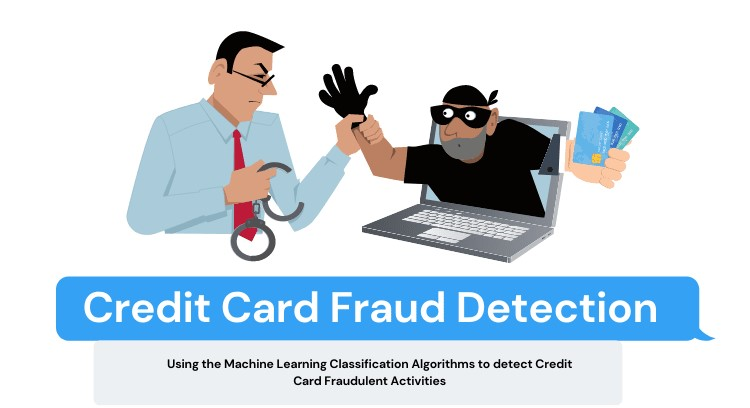

# Abstract:

The use of online banking and credit card is
increasing day by day. As the usage of credit/debit card or
netbanking is increasing, the possibility of many fraud activities
is also increasing. There are many incidents are happened in
presently where because of lack of knowledge the credit card
users are sharing their personal details, card details and one time
password to a unknown fake call. And the result will be fraud
happened with the account. Fraud is the problem that it is very
difficult to trace the fraud person if he made call from a fake
identity sim or call made by some internet services. So in this
research some supervised methodologies and algorithms are used
to detect fraud which gives approximate accurate results. The
illegal or fraud activities put very negative impact on the business
and customers loose trust on the company. It also affects the
revenue and turnover of the company. In this research isolation
forest algorithm is applied for classification to detect the fraud
activities and the data sets are collected from the professional
survey organizations.

# Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.



# Importing Library 

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import all the required library for machine learning 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
#load the dataset
creditcard_data = pd.read_csv("creditcard.csv")

In [3]:
# print the 5 rows
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Explorty Data Analysis

In [4]:
# check the dataset shape
creditcard_data.shape

(284807, 31)

In [5]:
#check the dataset datatype
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Data describe
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# check the missing value in the dataset
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As can seen, there is zero null value in the dataset.

In [8]:
# check the number of normal transaction and fraud transaction
creditcard_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequncy')

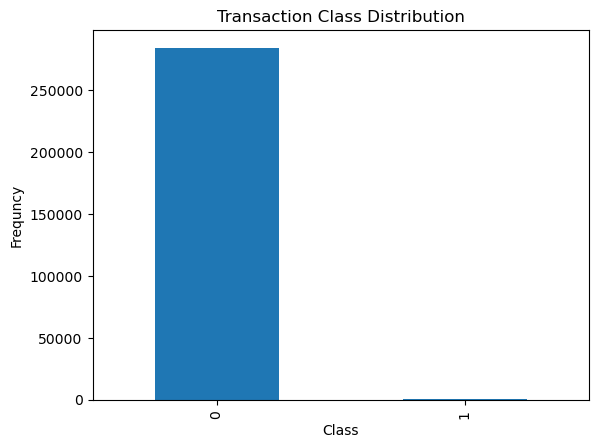

In [9]:
ax = creditcard_data.Class.value_counts().plot(kind='bar')

plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequncy")

0-->Ligit(Normal)transaction

1-->Fraud transaction

As can seen, this is highly unbalanced the data. The noraml transaction is 284315 and only 492 is fraud transaction.

In [10]:
# seprating the data analysis
normal = creditcard_data[creditcard_data.Class == 0]
fraud = creditcard_data[creditcard_data.Class == 1]

In [11]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
nt = len(normal)/len(creditcard_data)*100
print(nt)

99.82725143693798


In [13]:
ft = len(fraud)/len(creditcard_data)*100
print(ft)

0.1727485630620034


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

In [14]:
# seprating the data amount wise analysis
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

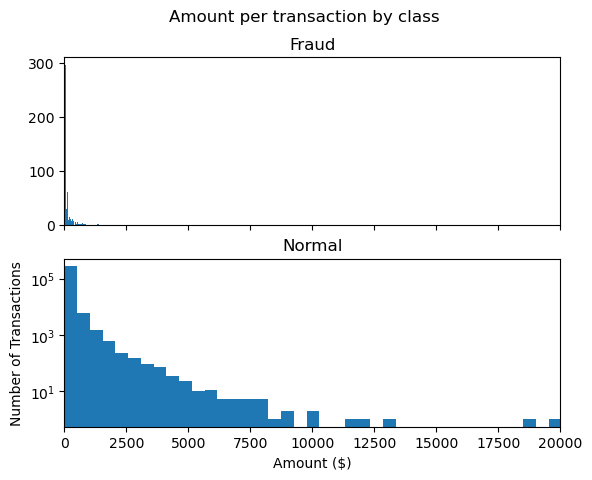

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

<AxesSubplot:>

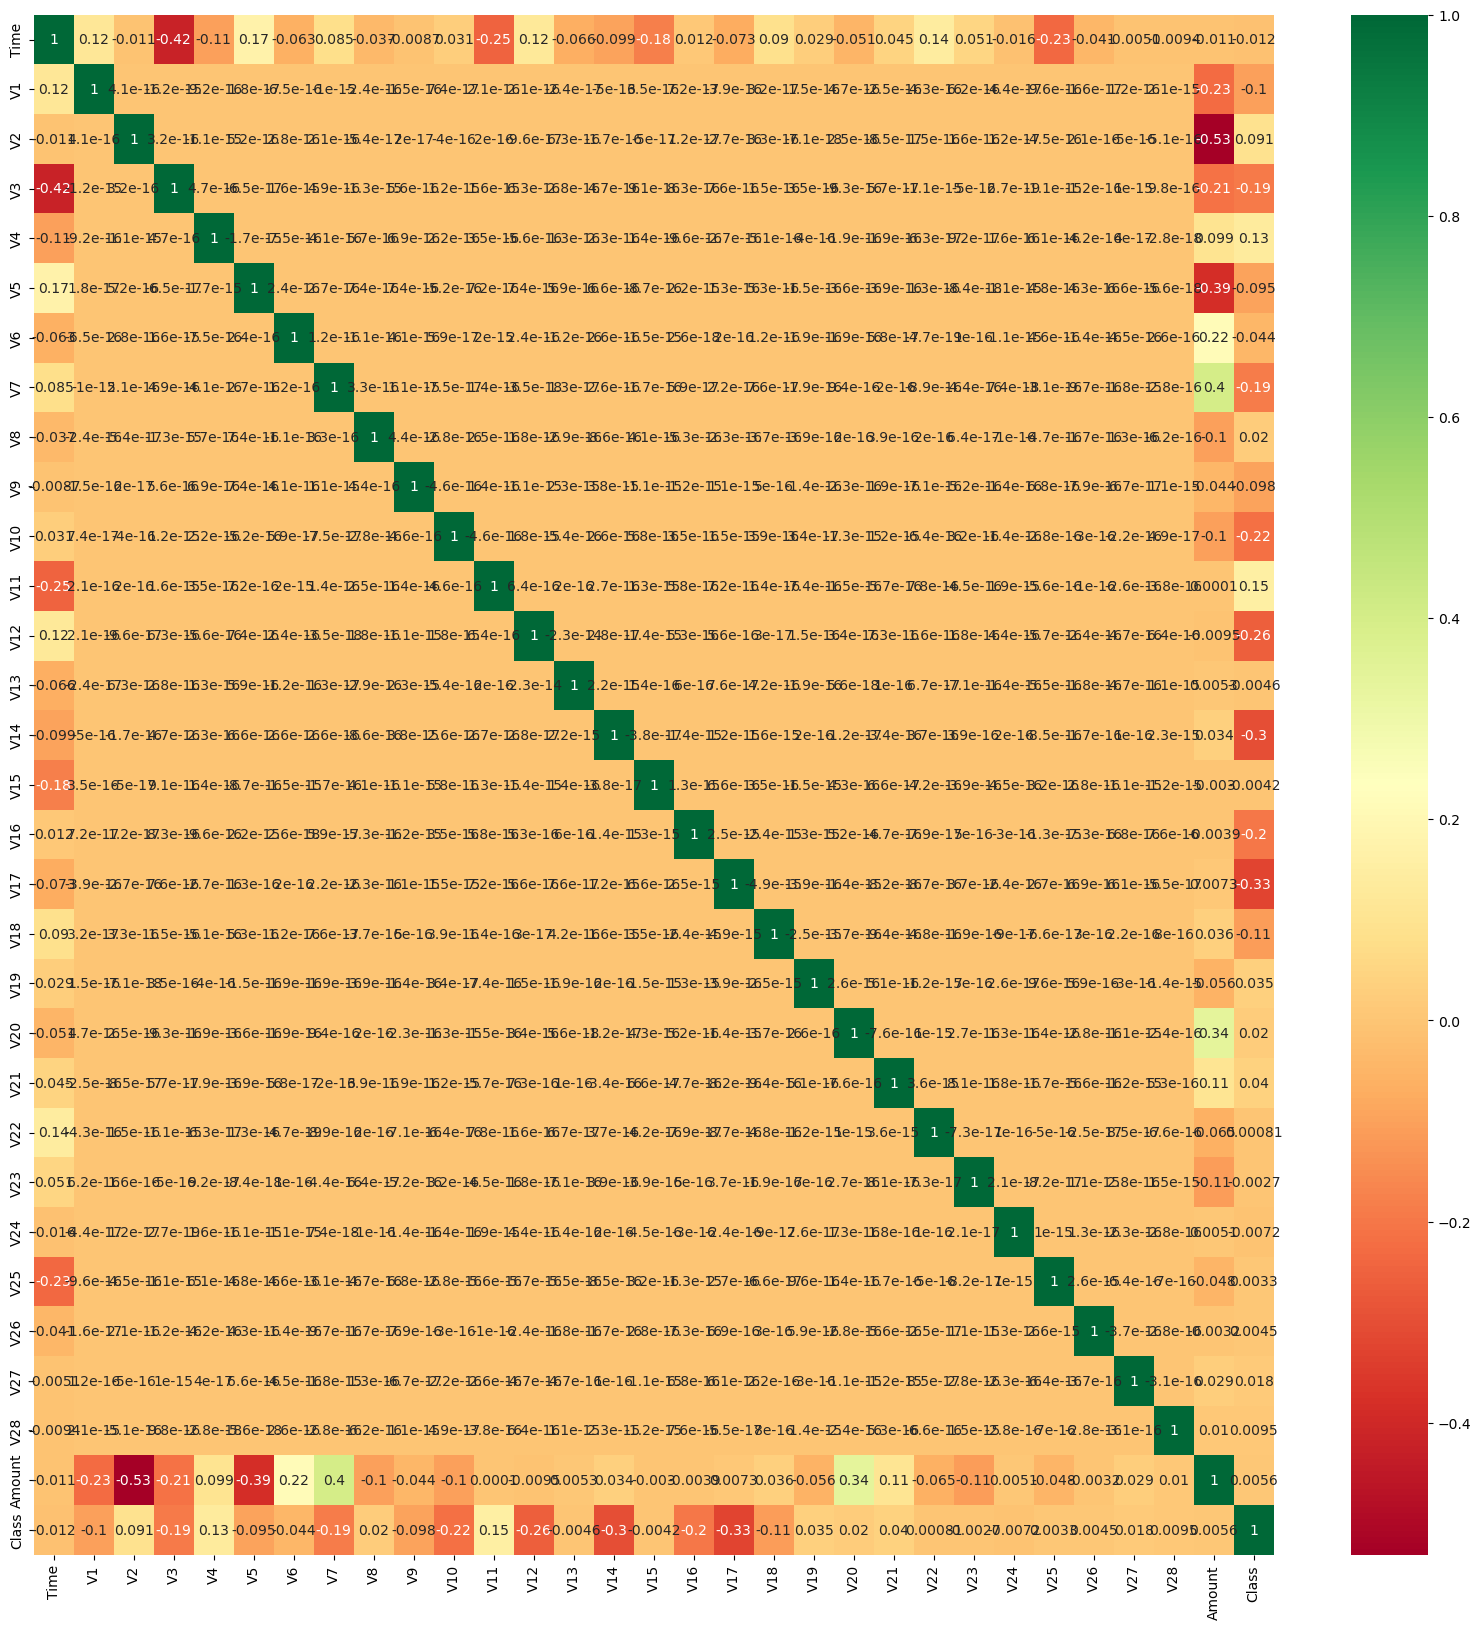

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(creditcard_data.corr(),cmap="RdYlGn", annot=True)

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

# Handale The Unbalanced Data - Under Sampling 

The data is highly unbalanced. The noraml transaction is 284315 and only 492 is fraud transaction. 

Using the under sampling method we balance the data.

In [18]:
ligit = normal.sample(n=492)

In [19]:
# using the under sampling method merage the ligit and fraud dataframe
new_df  = pd.concat([ligit,fraud], axis = 0)

In [20]:
new_df["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

As can seen clearly now the data is balance.

# Splitting the data into Features & Targets

In [21]:
x = new_df.drop(columns= "Class", axis = 1)
y = new_df.Class

# Split the data into Training data & Testing Data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 40)

In [23]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(787, 30) (197, 30) (787,) (197,)


In [24]:
creditcard_data.shape

(284807, 31)

# Hyper-Parameter Tuning

# Model Train

In [25]:
model_params = {
    'logistic regression' : {
        'model': LogisticRegression(),
        'parameter' : {
            'solver': ['liblinear']
        }
    },
    'svm' : {
        'model' : svm.SVC(),
        'parameter' : {
            'kernel' : ['rbf','linear'],
            'C' : [10,15,20]
        }
    },
    'decision tree' : {
        'model' : DecisionTreeClassifier(),
        'parameter' : {
            'criterion' : ['gini', 'entropy']
        }
    },
    'random forest' : {
        'model': RandomForestClassifier(),
        'parameter' : {
            'criterion': ['gini','entropy'],
            'n_estimators' : [50,100,150]
        }
    },
    'naive_bayes_gaussian' : {
        'model' : GaussianNB(),
        'parameter' : {}
    },
    'k nearest neighbors': {
        'model' : KNeighborsClassifier(),
        'parameter' : {
            'n_neighbors' : [5,10,15]
        }
    }
}

In [26]:
score = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['parameter'], cv=5)
    clf.fit(x_train,y_train)
    score.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
cc_df = pd.DataFrame(score, columns = ['model', 'best_score', 'best_params'])
cc_df

,model,best_score,best_params
0,logistic regression,0.928824,{'solver': 'liblinear'}
1,svm,0.917391,"{'C': 10, 'kernel': 'linear'}"
2,decision tree,0.897146,{'criterion': 'gini'}
3,random forest,0.938999,"{'criterion': 'entropy', 'n_estimators': 50}"
4,naive_bayes_gaussian,0.866597,{}
5,k nearest neighbors,0.636660,{'n_neighbors': 10}


## Observations:

1) Random Forest has 93.9% more accurate the logistic regression of 92.9% and SVM of 91.7% and Decision tree of 89.7% and gaussion naive_bayes of 86.7% and KNN of 63.7%.

2) So overall Random Forest has the highest score 93.8% among all models. And its best parameter is- {'criterion': 'entropy', 'n_estimators': 50}.

3) We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases